<h1 style="text-align: center;">Frequency Response</h1>
<p style="text-align: center;">Lab 10</p>
<p style="text-align: center;">Spring 2024</p>

### 1. Purpose 
Become familiar with frequency response tools and Bode plots using Python.  

### 2. Deliverables Overview 
##### Part 1  
[ ] Bode plot for **Part 1, Task 1**.  
[ ] Bode plot for **Part 1, Task 2**.  
[ ] Bode plot for **Part 1, Task 3**.  
##### Part 2  
[ ] Time-domain plot for **Part 2, Task 1**.  
[ ] Code for **Part 2, Task 2**.  
[ ] Code for **Part 2, Task 3**. 
[ ] Time-domain plot for **Part 2, Task 4**.

### 3. Part 1
##### 3.0.1 Example Code
The following code shows how to use the **control.TransferFunction()** and **control.bode()** methods. Consult the documentation for further usage if necessary. 

In [1]:
""" This code is non-functioning, it serves to show syntax for the control.TransferFunction() and control.bode() functions. """

import control as con #This package is not included in Anaconda and should have been installed in lab 0

sys = con.TransferFunction(num, den) #S-domain numerator and denominator similar to scipy.signal functions we have used before
_ = con.bode(sys, omega, dB=True, Hz=True, deg=True, Plot=True) #Use _ to suppress the output, this will still plot because of the Plot=True parameter

NameError: name 'num' is not defined

##### 3.1 Purpose  
Develop a frequency response from the RLC circuit from **Prelab 10** and present the model using Bode plots.  

##### 3.2 Tasks  
Consider the RLC circuit from **Prelab 10**, which has the values R = 1 k$\Omega$, L = 27 mH, C = 100 nF and has the transfer function, $$H(s) = \frac{\frac{1}{RC}s}{s^2 + \frac{1}{RC}s + \frac{1}{LC}}.$$  
1. Use the expressions found in the prelab to plot the magnitude (in dB) and the phase (in degrees) in Python for the RLC transfer function $H(s)$ from $10^3 \ \frac{rad}{s} \le \omega \le 10^6 \ \frac{rad}{s}$ using an adequately small step size. Use **matplotlib.pyplot.semilogx()** instead of **matplotlib.pyplot.plot()** to plot the x-axis on a logarithmic scale. *Note: You may need to adjust part of the phase plot.*

In [2]:
#Insert all necessary imports here
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import control as con

In [79]:
def shifted(eq):
    '''
    takes in an array type variable (for phase) and checks if the phase is above 90 then subtracts 180 from it
    INPUT: eq - array of phase values
    OUTPUT: shiftedEq - array of shifted phase values
    '''
    shiftedEq = eq.copy()
    for i in range(len(eq)):
        while shiftedEq[i] > 90:
            shiftedEq[i] -= 180
        while shiftedEq[i] < -90:
            shiftedEq[i] += 180
    return shiftedEq

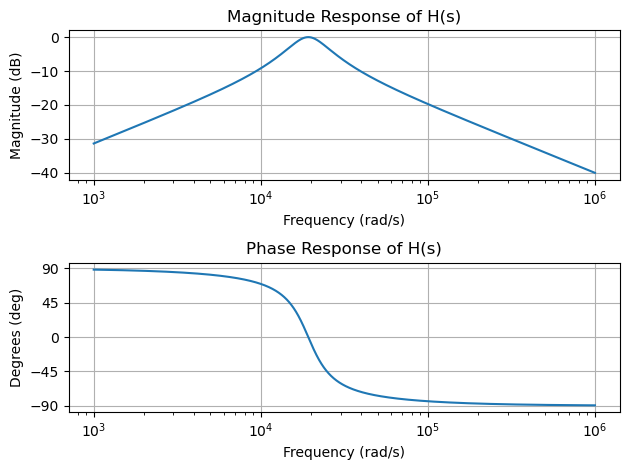

In [83]:
#Insert code for Part 1 Task 1 here
R = 1000
L = 27e-3
C = 100e-9

steps = 10
omega = np.arange(1e3, 1e6+steps, steps)
s = omega #* 1j

magEq = (s / (R*C)) / (np.sqrt(s**4 + ((1 / (R*C))**2 - (2 / (L*C))) * s**2 + (1 / (L*C))**2))
phiEq = (np.pi/2) - np.arctan((s / (R*C)) / (-s**2 + (1 / (L*C)))) 

mag = 20 * np.log10(np.abs(magEq))
phi = shifted(np.degrees(phiEq))

plt.figure()
# mag plot
plt.subplot(2, 1, 1)
plt.semilogx(omega, mag)
plt.title("Magnitude Response of H(s)")
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Magnitude (dB)")
plt.grid()
# phase plot
plt.subplot(2, 1, 2)
plt.semilogx(omega, phi)
plt.title("Phase Response of H(s)")
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Degrees (deg)")
plt.yticks([90, 45, 0, -45, -90])
plt.grid()

plt.tight_layout()
plt.show()

2. Use **scipy.signal.bode()** to plot the magnitude and phase frequency response for the RLC transfer function. Check that the plots generated using your hand-derived magnitude and phase match the Bode plot. *Note: You may need to adjust part of the phase by $\pi$ radians to match your results in this task.*

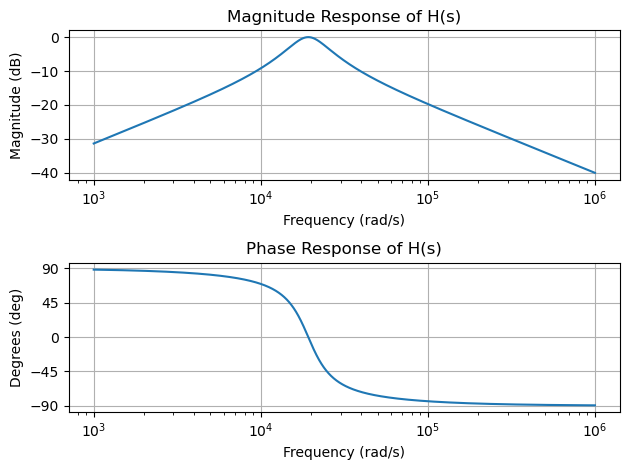

In [85]:
#Insert code for Part 1 Task 2 here
R = 1000 #1k ohm
L = 27e-3 #27 mH
C = 100e-9 #100 nF

steps = 10
omega = np.arange(1e3, 1e6+steps, steps)
s = 1j * omega

#sig.bode and needed what-not
num = [(1/(R*C)),0]
den = [1,(1/(R*C)), (1/(L*C))]
sys = sig.TransferFunction(num, den)
w, mag, phi = sig.bode(sys, omega, steps)

plt.figure()
#mag
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)
plt.title("Magnitude Response of H(s)")
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Magnitude (dB)")
plt.grid()

#phase
plt.subplot(2, 1, 2)
plt.semilogx(w, phi)
plt.title("Phase Response of H(s)")
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Degrees (deg)")
plt.yticks([90, 45, 0, -45, -90])
plt.grid()

plt.tight_layout()
plt.show()

3. In most engineering situations, it may be desirable to find the frequency response with respect to Hz, not rad/s. We may also want to set the specific range of frequencies over which to plot the frequency. Print the transfer function after using **control.TransferFunction()**. Plot the frequency response of the system in Hz using **control.bode()** and following the example code given earlier in the lab. 


         1e+04 s
-------------------------
s^2 + 1e+04 s + 3.704e+08



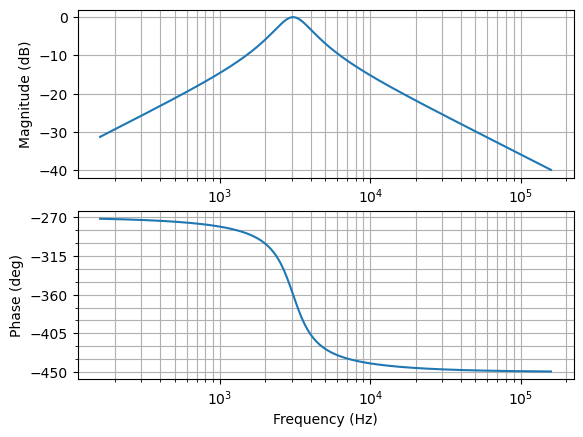

In [84]:
#Insert code for Part 1 Task 3 here
# sys = con.TransferFunction(num, den) #S-domain numerator and denominator similar to scipy.signal functions we have used before
# _ = con.bode(sys, omega, dB=True, Hz=True, deg=True, Plot=True) #Use _ to suppress the output, this will still plot because of the Plot=True parameter

R = 1000 #1k ohm
L = 27e-3 #27 mH
C = 100e-9 #100 nF
steps = 10
omega = np.arange(1e3, 1e6+steps, steps)

num = [(1/(R*C)),0]
den = [1, (1/(R*C)), (1/(L*C))]
sys = con.TransferFunction(num, den)
print(sys) #prints ^^

#plot frequency response of sys in Hz using con.bode()
_ = con.bode(sys, omega, dB=True, Hz=True, deg=True, plot=True)

### 4. Part 2  
##### 4.1 Purpose
Use the frequency response model developed in **Part 1** as a filter for a multi-band input signal.

##### 4.2 Tasks  
1. Plot the signal, $$x(t) = \cos(2\pi\cdot100t) + \cos(2\pi\cdot3024t) + \sin(2\pi\cdot50000t)$$ from $0 \le t \le 0.01$ s, setting the sampling frequency high enough to capture all three frequencies and the step size of $\frac{1}{f_s}$.

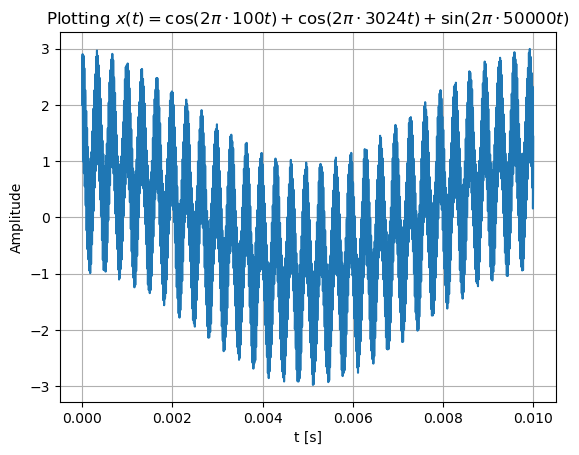

In [105]:
#Insert code for Part 2 Task 1 here
freq = 2*np.pi * 50000
steps = 1/freq
t = np.arange(0, 0.01+steps, steps)

x = np.cos(2*np.pi * 100*t) + np.cos(2*np.pi * 3024*t) + np.sin(2*np.pi * 50000*t)

plt.figure()
plt.plot(t, x)
plt.title(f"Plotting $x(t) = \cos(2\pi\cdot100t) + \cos(2\pi\cdot3024t) + \sin(2\pi\cdot50000t)$")
plt.ylabel("Amplitude")
plt.xlabel("t [s]")
plt.grid()
plt.show()

2. To pass the input signal $x(t)$ through the RLC circuit, the transfer function must be converter into its z-domain equivalent. This can be done automatically by Python using **scipy.signal.bilinear()**. *Note: You will be responsible for looking up the documentation on how to use this function.*

In [123]:
#Insert code for Part 2 Task 2 here
R = 1000 #1k ohm
L = 27e-3 #27 mH
C = 100e-9 #100 nF
freq = 2*np.pi * 50000

num = [(1/(R*C)),0]
den = [1, (1/(R*C)), (1/(L*C))]

biNum, biDen = sig.bilinear(num, den, freq)
print(f"Numerator: {biNum} \nDenominator: {biDen}")

Numerator: [ 0.01565171  0.         -0.01565171] 
Denominator: [ 1.         -1.96500615  0.96869659]


3. Use **scipy.signal.lfilter()** to pass the input signal through the filter. Since your output will be a large array, there is no need to print the output.

In [124]:
#Insert code for Part 2 Task 3 here
filtered = sig.lfilter(biNum, biDen, x)

4. Plot the output signal $y(t)$ over the same time period as **Part 2 Task 1**.

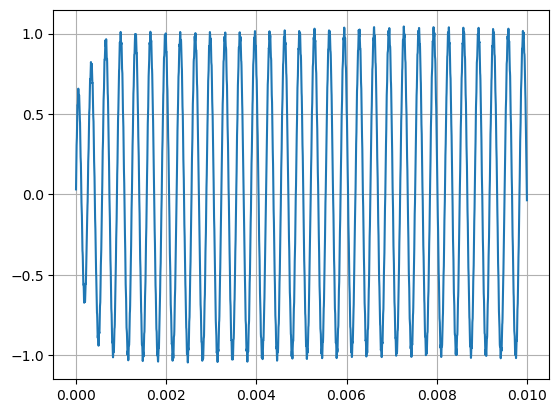

In [125]:
#Insert code for Part 2 Task 4 here
plt.figure()
plt.plot(t, filtered)
plt.grid()
plt.show()

### 5. Questions
1. Explain how the filter and filtered output in **Part 2** makes sense given the Bode plots from **Part 1**. Discuss how the filter modifies specific frequency bands, in Hz. 
>Given the Bode plots from Part 1, the filter and it's output in Part 2 makes sense because all of the values that were let in in Part 2 correlate with the values of the Bode plot. The filter modifes the specific frequency bands by using the inductor and capacitor to cut off the low and high frequencies. 
2. Discuss the purpose and workings of **scipy.signal.bilinear()** and **scipy.signal.lfilter()**. 
>**scipy.signal.bilinear()** is used to transform a set of poles andn zeros from the s-plane to the z-plane. This function takes in the numberator, denominator, and the desired frequency. It then uses the Tustin method to transform the inputs from the s to the z-plane where they're output as a numerator and denominator. This function would be used when the programmer doesn't want to do the transformations by hand or create a function to do so. **scipy.signal.lfilter()** is used to push an input signal through a filter and receive the filtered values as the output to the function. This function takes in the numerator and denominator of the filter as well as the array of values from the input function. It then filters the input signal array through the numerator and denominator where it outputs the array of filtered values. This function would be used when the programmer does not want to manually create a function that filters the values of the input signal.
3. What happens if you use a different sampling frequency in **scipy.signal.bilinear()** than you used for the time-domain signal?
>When you use a different sampling frequency in scipy.signal.bilinear, the resulting in different amounts of noise to be let through. With smaller than 2 $\pi$ *50000 Hz there is a lot more noise in the graph. But with more than that frequency the waves become closer and closer to a cosine wave (in this case). For me, this happened around 1e9 Hz. 
4. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>no feedback :\)